In [49]:
#author = 0712238@NCTU, Maxwill Lin, YT Lin
#last update = 2019.11.07
#usage = HW1 of Deep Learning 2019 fall @ NCTU 
#classification part 
#preprocess
#NN(2D) architectur = NN([34, 17, 2, 1],activations=['relu', 'relu', 'sigmoid'], usage = 'classification')
#NN2(3D) architectur = NN([34, 17, 3, 1],activations=['relu', 'relu', 'sigmoid'], usage = 'classification')
#train and test with split data set
#learning curve + train/test CE + train/test accuracy/error rate
#visualization with 2D/3D scatters 
#save files

#2019.11.06-07 some bug fixed, improvement on weight init, experiments
#2019.11.07 test different epoch 500+overfitting, 43 = final choice

In [10]:
import numpy as np
import math
import pandas as pd
from model import *
import csv
import matplotlib.pyplot as plt
import pickle

In [13]:
df =  pd.read_csv("ionosphere_csv.csv")

In [14]:
def normalize(X):
    s = [ np.mean(dim) for dim in X.T]
    X = np.asarray([np.divide(x, s) for x in X])
    return X

y = df["class"].values
y = np.asarray([[float(yi == 'g')] for yi in y])
#print(y.shape) (351,1)
X = df.drop(["class"], axis=1).values

def partition(X, y, ratio=0.8):
    n = X.shape[0]
    indices = np.arange(n)
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]
    p = int(n*ratio)
    train_X = X[:p]
    test_X = X[p:]
    train_y = y[:p]
    test_y = y[p:]
    return train_X, train_y, test_X, test_y

train_X, train_y, test_X, test_y = partition(X, y, ratio=0.8)


43
train_CE =  0.003333435936526199 
 test_CE =  0.04331779746437199
train_Accuracy =  0.9857142857142858 
 test_Accuracy =  0.8309859154929577
train_ErrorRate =  0.014285714285714235 
 test_ErrorRate =  0.16901408450704225


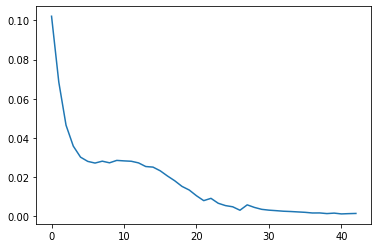

In [45]:
nn = NN([34, 17, 2, 1],activations=['selu','selu', 'sigmoid'], usage = 'classification')
#the network architecture is as the constructer
VC_time = 20
epochs = int((34+2)*17*VC_time/train_X.shape[0])
print(epochs)

learning_curve = nn.train(train_X, train_y, epochs=epochs, batch_size=10, lr = .10)

train_CE = nn.calc_error(train_X, train_y)
train_accuracy = nn.calc_accuracy(train_X, train_y)
test_CE = nn.calc_error(test_X, test_y)
test_accuracy = nn.calc_accuracy(test_X, test_y)

plt.plot(np.arange(len(learning_curve)), learning_curve)
print('train_CE = ', train_CE, '\n', 'test_CE = ', test_CE)
print('train_Accuracy = ', train_accuracy, '\n', 'test_Accuracy = ', test_accuracy)
print('train_ErrorRate = ', 1-train_accuracy, '\n', 'test_ErrorRate = ', 1-test_accuracy)

43
train_CE =  0.002611570012464759 
 test_CE =  0.045097036092511256
train_Accuracy =  0.975 
 test_Accuracy =  0.8591549295774648
train_ErrorRate =  0.025000000000000022 
 test_ErrorRate =  0.14084507042253525


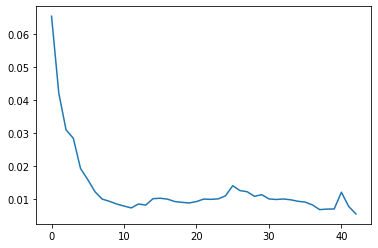

In [46]:
nn2 = NN([34, 17, 3, 1],activations=['selu', 'selu', 'sigmoid'], usage = 'classification')
#the network architecture is as the constructer
VC_time = 20
epochs = int((34+2)*17*VC_time/train_X.shape[0])
print(epochs)

learning_curve = nn2.train(train_X, train_y, epochs=epochs, batch_size=10, lr = .1)

train_CE = nn2.calc_error(train_X, train_y)
train_accuracy = nn2.calc_accuracy(train_X, train_y)
test_CE = nn2.calc_error(test_X, test_y)
test_accuracy = nn2.calc_accuracy(test_X, test_y)

plt.plot(np.arange(len(learning_curve)), learning_curve)

print('train_CE = ', train_CE, '\n', 'test_CE = ', test_CE)
print('train_Accuracy = ', train_accuracy, '\n', 'test_Accuracy = ', test_accuracy)
print('train_ErrorRate = ', 1-train_accuracy, '\n', 'test_ErrorRate = ', 1-test_accuracy)

In [39]:
def plot2D(nn, X):
    _, a_s = nn.feedforward(X.T)
    cos = a_s[-2]
    label = a_s[-1]
    n = a_s[-2].shape[1]
    assert(a_s[-2].shape[0] == 2)
    colors = ("red", "blue")
    groups = ("good", "bad")

    for i in range(n):
        k = int(label[0][i]>=0.5)
        plt.scatter(cos[0][i], cos[1][i], c=colors[k], edgecolors='none')

    plt.title('2D hidden feature scatter graph')
    plt.show()
    
from mpl_toolkits.mplot3d import Axes3D

def plot3D(nn, X):
    _, a_s = nn.feedforward(X.T)
    cos = a_s[-2]
    label = a_s[-1]
    n = a_s[-2].shape[1]
    assert(a_s[-2].shape[0] == 3)
    colors = ("red", "blue")
    groups = ("good", "bad")
    
    fig = plt.figure()
    ax = Axes3D(fig)
    for i in range(n):
        k = int(label[0][i]>=0.5)
        ax.scatter(cos[0][i], cos[1][i], cos[2][i], c=colors[k])

    plt.title('3D hidden feature scatter graph')
    plt.show()

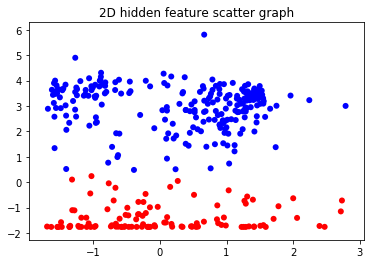

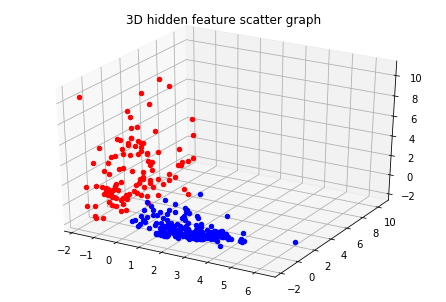

In [47]:
plot2D(nn, X)
plot3D(nn2, X)

In [48]:
def save_file(name):
    pathcsv = "./predictions/"
    file_train_csv = pathcsv + "class_train_pred_"+name+".csv" 
    file_test_csv = pathcsv + "class_test_pred_"+name+".csv" 
    pathnn = "./savedmodels/"
    savefilename = pathnn + "nn_"+name+"_2D"
    savefilename2 = pathnn + "nn_"+name+"_3D"
    
    with open(file_train_csv, 'w', newline='') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerow(['prediction', 'label'])
        for i in range(train_X.shape[0]):
            writer.writerow([nn.prediction(np.asarray([train_X[i]]))[0][0], train_y[i][0]])
    with open(file_test_csv, 'w', newline='') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerow(['prediction', 'label'])
        for i in range(test_X.shape[0]):
            writer.writerow([nn.prediction(np.asarray([test_X[i]]))[0][0], test_y[i][0]])
        
    with open(savefilename, 'wb') as fo:
        pickle.dump(nn, fo)
    with open(savefilename2, 'wb') as fo:
        pickle.dump(nn2, fo)

save_file("1107_1")